
This notebook walks through the implementation and analysis of the Insider Trading Machine Learning Project. It walks through using the created dataset. The code for (1) pulling Form 4 data from EDGAR and (2) creating the dataset is in sec_crawler.py and create_dataset.py, respectively.

To start we load the dataset into a Pandas Dataframe.

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("dataset_norm_sector.csv")

Next, we conduct some simple data preprocessing. First we drop missing datapoints ('None': points for which data is not available (before Jan-2013), 'Fail': points for which stock price data was missing, and any NaN values). We also drop the COMPANY ticker column, and cleanup the market cap category data.

Finally, we define a function to separate the non-binary discrete variables into multiple binary variables using the get_dummies function. We use this function later on to split market sector data into 10 binary variables, and market cap data into 3 binary variables.


In [3]:
#Cleanup dataset
dataset = dataset[dataset.RETURN != 'None']
dataset = dataset[dataset.RETURN != 'Fail']
dataset.dropna(axis=0, inplace=True)
dataset = dataset.drop(['COMPANY'], axis=1)
dataset['MKTCAP'].replace('.*Small.', 'small', inplace=True, regex=True)
dataset['MKTCAP'].replace('.*Mid.', 'mid', inplace=True, regex=True)
dataset['MKTCAP'].replace('.*Large.', 'large', inplace=True, regex=True)

#Create binary variables for non-binary discrete variables
def preprocess_features(X):
    output = pd.DataFrame(index = X.index)
    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        output = output.join(col_data)
    return output

    

Below is a sample of the dataset for visualization purposes.

In [4]:
dataset.head()

,NBC1,NBC2,NBC3,NBC4,NBC5,NBC6,NBC7,NBC8,NBC9,NBC10,...,NBV6,NBV7,NBV8,NBV9,NBV10,NBV11,NBV12,SECTOR,MKTCAP,RETURN
26,1.000000,0.066667,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.428571,-0.500000,-0.428571,...,0.000000,-0.077273,-0.143460,-0.111842,-0.142857,-0.190212,-0.183784,Information Technology,small,-0.038247887838
27,0.066667,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.428571,-0.500000,-0.428571,-0.217391,...,-0.077273,-0.143460,-0.111842,-0.142857,-0.190212,-0.183784,-0.139860,Information Technology,small,0.0707736976746
28,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.428571,-0.500000,-0.428571,-0.217391,-0.578947,...,-0.143460,-0.111842,-0.142857,-0.190212,-0.183784,-0.139860,-0.007563,Information Technology,small,-0.0917734937395
29,0.000000,0.000000,0.000000,-0.333333,-0.428571,-0.500000,-0.428571,-0.217391,-0.578947,-0.428571,...,-0.111842,-0.142857,-0.190212,-0.183784,-0.139860,-0.007563,0.006516,Information Technology,small,0.126127808822
30,0.000000,0.000000,-0.333333,-0.428571,-0.500000,-0.428571,-0.217391,-0.578947,-0.428571,0.555556,...,-0.142857,-0.190212,-0.183784,-0.139860,-0.007563,0.006516,-0.072261,Information Technology,small,-0.131451077943


# Statistics




The code below generates statistics on return, net buy count, and net buy volume across the dataset.

In [15]:
ret_data = dataset['RETURN'].apply(pd.to_numeric, errors='coerce')
min_return = np.min(ret_data)
max_return = np.max(ret_data)
mean_return = np.mean(ret_data)
median_return = np.median(ret_data)
std_return = np.std(ret_data)
fq_return = np.percentile(ret_data,25)
tq_return = np.percentile(ret_data,75)
print "Min return: " + str(min_return)
print "Max return: " + str(max_return)
print "Mean return: " + str(mean_return)
print "Median return: " + str(median_return)
print "Std Dev of return: " + str(std_return)
print "First quartile: " + str(fq_return)
print "Third quartile: " + str(tq_return)

all_nbc = np.concatenate([dataset['NBC' + str(i)].apply(pd.to_numeric, errors='coerce') for i in range(1,13)])
min_nbc = min(all_nbc)
max_nbc = max(all_nbc)
mean_nbc = np.mean(all_nbc)
median_nbc = np.median(all_nbc)
std_nbc = np.std(all_nbc)
fq_nbc = np.percentile(all_nbc, 25)
tq_nbc = np.percentile(all_nbc, 75)
print "Min NBC: " + str(min_nbc)
print "Max NBC: " + str(max_nbc)
print "Mean NBC: " + str(mean_nbc)
print "Median NBC: " + str(median_nbc)
print "Std NBC: " + str(std_nbc)
print "FQ NBC: " + str(fq_nbc)
print "TQ NBC: " + str(tq_nbc)

all_nbv = np.concatenate([dataset['NBV' + str(i)].apply(pd.to_numeric, errors='coerce') for i in range(1,13)])
min_nbv = min(all_nbv)
max_nbv = max(all_nbv)
mean_nbv = np.mean(all_nbv)
median_nbv = np.median(all_nbv)
std_nbv = np.std(all_nbv)
fq_nbv = np.percentile(all_nbv, 25)
tq_nbv = np.percentile(all_nbv, 75)
print "Min NBV: " + str(min_nbv)
print "Max NBV: " + str(max_nbv)
print "Mean NBV: " + str(mean_nbv)
print "Median NBV: " + str(median_nbv)
print "Std NBV: " + str(std_nbv)
print "FQ NBV: " + str(fq_nbv)
print "TQ NBV: " + str(tq_nbv)


Min return: -0.886935052712
Max return: 3.55497844107
Mean return: 0.003545939211
Median return: 0.00135931251718
Std Dev of return: 0.0826228466329
First quartile: -0.0379613481341
Third quartile: 0.0408291879766
Min NBC: -1.0
Max NBC: 1.0
Mean NBC: -0.0189720982369
Median NBC: 0.0
Std NBC: 0.587571021083
FQ NBC: -0.333333333333
TQ NBC: 0.222222222222
Min NBV: -1.0
Max NBV: 1.0
Mean NBV: -0.0192918848698
Median NBV: 0.0
Std NBV: 0.550287663961
FQ NBV: -0.170218968089
TQ NBV: 0.0


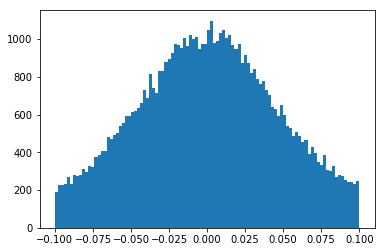

In [14]:
import matplotlib.pyplot as plt

plt.hist(ret_data, bins=100, range=(-.1,.1))
plt.show()